In [1]:
# 导入需要的包
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.datasets import boston_housing
from keras.layers import Dense, Dropout
from keras.utils import multi_gpu_model
from keras import regularizers  # 正则化
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

Using TensorFlow backend.


In [2]:
# 读取数据
path = '../boston_housing.npz'
f = np.load(path)
print(f.files)
print(f['y'])
print(f['x'])

['y', 'x']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 

In [3]:
# 将数据集分成测试集和训练集
# 404个训练，102个测试
# 训练数据
x_train=f['x'][:404]  # 下标0到下标403
y_train=f['y'][:404]
# 测试数据
x_valid=f['x'][404:]  # 下标404到下标505
y_valid=f['y'][404:]
# 读取数据后关闭
f.close()

In [4]:
# 转成DataFrame格式方便数据处理
x_train_pd = pd.DataFrame(x_train)#（404*13）
y_train_pd = pd.DataFrame(y_train)#（404*1）
x_valid_pd = pd.DataFrame(x_valid)#（102*13）
y_valid_pd = pd.DataFrame(y_valid)#（102*1）
print(x_train_pd)
print("***********************")
print(y_train_pd)
print("***********************")
print(x_valid_pd)
print("***********************")
print(y_valid_pd)

           0     1      2    3      4      5      6       7     8      9   \
0     0.00632  18.0   2.31  0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07  0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07  0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18  0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18  0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18  0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87  0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87  0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87  0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87  0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87  0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87  0.0  0.524  6.009   82.9  6.2267   5.0  311.0   

In [5]:
# 数据预处理
# 归一化
# 训练集归一化归一到[0,1]
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(x_train_pd)
x_train = min_max_scaler.transform(x_train_pd)

min_max_scaler.fit(y_train_pd)
y_train = min_max_scaler.transform(y_train_pd)

In [6]:
# 验证集归一化
min_max_scaler.fit(x_valid_pd)
x_valid = min_max_scaler.transform(x_valid_pd)

min_max_scaler.fit(y_valid_pd)
y_valid = min_max_scaler.transform(y_valid_pd)

In [7]:
print(x_train)
print("***********************")
print(y_train)
print("***********************")
print(x_valid)
print("***********************")
print(y_valid)

[[0.00000000e+00 1.80000000e-01 7.34418420e-02 ... 2.87234043e-01
  1.00000000e+00 8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.62405717e-01 ... 5.53191489e-01
  1.00000000e+00 2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.62405717e-01 ... 5.53191489e-01
  9.87519166e-01 6.34657837e-02]
 ...
 [1.59940420e-01 0.00000000e+00 7.00277888e-01 ... 8.08510638e-01
  1.00000000e+00 5.12969095e-01]
 [1.07782432e-01 0.00000000e+00 7.00277888e-01 ... 8.08510638e-01
  9.36246550e-01 5.12693157e-01]
 [2.78694093e-01 0.00000000e+00 7.00277888e-01 ... 8.08510638e-01
  1.00000000e+00 4.97792494e-01]]
***********************
[[0.42222222]
 [0.36888889]
 [0.66      ]
 [0.63111111]
 [0.69333333]
 [0.52666667]
 [0.39777778]
 [0.49111111]
 [0.25555556]
 [0.30888889]
 [0.22222222]
 [0.30888889]
 [0.37111111]
 [0.34222222]
 [0.29333333]
 [0.33111111]
 [0.40222222]
 [0.27777778]
 [0.33777778]
 [0.29333333]
 [0.19111111]
 [0.32444444]
 [0.22666667]
 [0.21111111]
 [0.23555556]
 [0.19777778]
 [0.25777778

In [8]:
# 定义模型
model = Sequential()  # 初始化
# 增加一个全连接层，激活函数为relu函数
model.add(Dense(units = 10,   # 输出大小
                activation='relu',  # 激励函数
                input_shape=(x_train_pd.shape[1],)  # 输入大小, 也就是列的大小
               )
         )
model.add(Dropout(0.2))  # 丢弃神经元链接概率
model.add(Dense(units = 15,
#                 kernel_regularizer=regularizers.l2(0.01),  # 施加在权重上的正则项  L2正则
#                 activity_regularizer=regularizers.l1(0.01),  # 施加在输出上的正则项 L1正则
                activation='relu' # 激励函数
#                 bias_regularizer=keras.regularizers.l1_l2(0.01)  # 施加在偏置向量上的正则项
               )
         )

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.add(Dense(units = 1,   
                activation='linear'  # 线性激励函数 回归一般在输出层用这个激励函数  
               )
         )

In [10]:
print(model.summary())  # 打印网络层次结构

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                140       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# 模型训练参数优化和损失
model.compile(loss='mse',  # 损失均方误差
              optimizer='adam',  # 优化器
             )

In [12]:
# 训练数据训练 模型
history = model.fit(x_train, y_train,
          epochs=200,  # 迭代次数
          batch_size=200,  # 每次用来梯度下降的批处理数据大小
          verbose=2,  # verbose：日志冗长度，int：冗长度，0：不输出训练过程，1：输出训练进度，2：输出每一个epoch
          validation_data = (x_valid, y_valid)  # 验证集
        )

Instructions for updating:
Use tf.cast instead.
Train on 404 samples, validate on 102 samples
Epoch 1/200
 - 2s - loss: 0.5538 - val_loss: 1.0484
Epoch 2/200
 - 0s - loss: 0.4516 - val_loss: 0.8668
Epoch 3/200
 - 0s - loss: 0.3847 - val_loss: 0.7110
Epoch 4/200
 - 0s - loss: 0.3215 - val_loss: 0.5840
Epoch 5/200
 - 0s - loss: 0.2731 - val_loss: 0.4847
Epoch 6/200
 - 0s - loss: 0.2281 - val_loss: 0.4065
Epoch 7/200
 - 0s - loss: 0.2072 - val_loss: 0.3453
Epoch 8/200
 - 0s - loss: 0.1631 - val_loss: 0.2972
Epoch 9/200
 - 0s - loss: 0.1515 - val_loss: 0.2582
Epoch 10/200
 - 0s - loss: 0.1230 - val_loss: 0.2251
Epoch 11/200
 - 0s - loss: 0.1168 - val_loss: 0.1969
Epoch 12/200
 - 0s - loss: 0.1007 - val_loss: 0.1775
Epoch 13/200
 - 0s - loss: 0.0862 - val_loss: 0.1628
Epoch 14/200
 - 0s - loss: 0.0988 - val_loss: 0.1492
Epoch 15/200
 - 0s - loss: 0.0854 - val_loss: 0.1369
Epoch 16/200
 - 0s - loss: 0.0886 - val_loss: 0.1264
Epoch 17/200
 - 0s - loss: 0.0898 - val_loss: 0.1199
Epoch 18/200
 

Epoch 150/200
 - 0s - loss: 0.0347 - val_loss: 0.0362
Epoch 151/200
 - 0s - loss: 0.0331 - val_loss: 0.0350
Epoch 152/200
 - 0s - loss: 0.0305 - val_loss: 0.0337
Epoch 153/200
 - 0s - loss: 0.0301 - val_loss: 0.0325
Epoch 154/200
 - 0s - loss: 0.0360 - val_loss: 0.0318
Epoch 155/200
 - 0s - loss: 0.0325 - val_loss: 0.0318
Epoch 156/200
 - 0s - loss: 0.0330 - val_loss: 0.0326
Epoch 157/200
 - 0s - loss: 0.0314 - val_loss: 0.0334
Epoch 158/200
 - 0s - loss: 0.0311 - val_loss: 0.0337
Epoch 159/200
 - 0s - loss: 0.0278 - val_loss: 0.0338
Epoch 160/200
 - 0s - loss: 0.0334 - val_loss: 0.0330
Epoch 161/200
 - 0s - loss: 0.0311 - val_loss: 0.0319
Epoch 162/200
 - 0s - loss: 0.0292 - val_loss: 0.0308
Epoch 163/200
 - 0s - loss: 0.0312 - val_loss: 0.0302
Epoch 164/200
 - 0s - loss: 0.0333 - val_loss: 0.0303
Epoch 165/200
 - 0s - loss: 0.0300 - val_loss: 0.0308
Epoch 166/200
 - 0s - loss: 0.0331 - val_loss: 0.0312
Epoch 167/200
 - 0s - loss: 0.0340 - val_loss: 0.0320
Epoch 168/200
 - 0s - loss: 

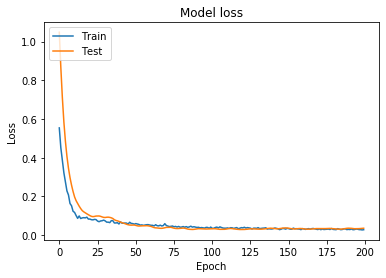

In [13]:
# 结果可视化
import matplotlib.pyplot as plt
# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')#图例
plt.show()

In [14]:
# 保存模型
from keras.utils import plot_model
from keras.models import load_model
# 保存模型
model.save('model_MLP.h5')  # creates a HDF5 file 'my_model.h5'

#模型可视化 pip install pydot
plot_model(model, to_file='model_MLP.png', show_shapes=True)

# 加载模型
model = load_model('model_MLP.h5')


OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [15]:
# 加载模型
model = load_model('model_MLP.h5')

# 预测
y_new = model.predict(x_valid)
print(y_new)
# 反归一化
# min_max_scaler.fit(y_valid_pd)
# y_new = min_max_scaler.inverse_transform(y_new)

[[0.27702862]
 [0.25031257]
 [0.20917946]
 [0.26813802]
 [0.36397153]
 [0.43305635]
 [0.17515303]
 [0.36637414]
 [0.23052822]
 [0.24360819]
 [0.14860557]
 [0.31485856]
 [0.36424053]
 [0.23285209]
 [0.12926735]
 [0.34307858]
 [0.33913052]
 [0.30298796]
 [0.29765093]
 [0.2895295 ]
 [0.2766437 ]
 [0.24513629]
 [0.3032602 ]
 [0.22561587]
 [0.29937473]
 [0.3091315 ]
 [0.3264445 ]
 [0.3945965 ]
 [0.33055967]
 [0.27261242]
 [0.24310365]
 [0.30768245]
 [0.22962067]
 [0.21622984]
 [0.27510428]
 [0.31965196]
 [0.30954075]
 [0.3878107 ]
 [0.36615044]
 [0.39640933]
 [0.2655473 ]
 [0.26851708]
 [0.34800446]
 [0.34947678]
 [0.35647747]
 [0.35219887]
 [0.27615485]
 [0.3993067 ]
 [0.3782126 ]
 [0.4882069 ]
 [0.27186763]
 [0.2772883 ]
 [0.23932122]
 [0.24113138]
 [0.32557902]
 [0.35159954]
 [0.36386213]
 [0.38514632]
 [0.37879872]
 [0.3750285 ]
 [0.39910674]
 [0.368768  ]
 [0.26642397]
 [0.3877805 ]
 [0.3924833 ]
 [0.38576412]
 [0.42072994]
 [0.42417064]
 [0.45761937]
 [0.49790066]
 [0.31608358]
 [0.40

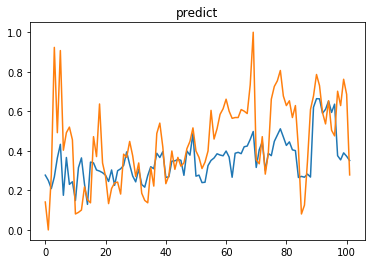

In [16]:
plt.plot(y_new)
plt.plot(y_valid)
plt.title('predict')
plt.show()